In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
from keras.preprocessing.image import ImageDataGenerator

test_dir='./test_without_callback'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
shuffle=False)

Using TensorFlow backend.


Found 571 images belonging to 4 classes.


In [20]:
y = test_generator.classes

In [9]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [10]:
from keras import layers, models
from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def model_load(model):
    model = load_model(model,compile=False)
    model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4), 
            metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])
    
    return model

In [11]:
from keras.models import load_model

model_type=model_load('./png_models/png_model_type.hdf5')
model_pathology=model_load('./png_models/png_model_pathology_donse2.hdf5')

In [12]:
predict_type = model_type.predict_generator(test_generator)
predict_pathology=model_pathology.predict_generator(test_generator)

In [13]:
output_type=np.argmax(predict_type,axis=1)
output_pathology=np.argmax(predict_pathology,axis=1)

In [22]:
output_pathology

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [15]:
predict=np.arange(571)

In [16]:
for i in range(len(output_type)):
    if output_type[i]==0:
        predict[i]='0'
    else:
        predict[i]='2'

In [17]:
for i in range(len(output_pathology)):
    if output_pathology[i]==0:
        continue
    else:
        predict[i]+=1

In [18]:
predict

array([0, 1, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 3, 1, 2, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 2, 0, 3, 1, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 3, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 3, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 3, 0, 3, 1, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 3, 1, 2, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 1, 1, 1,
       1, 1, 3, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 2, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3,
       2, 0, 1, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 2, 3,

In [23]:
#accuryca 출력하기
from sklearn.metrics import accuracy_score

accuracy_score(y,predict)

0.6147110332749562

In [27]:
from sklearn.metrics import confusion_matrix

matrix =confusion_matrix(y, predict)

matrix

array([[ 69,  44,  12,  10],
       [ 46,  75,   5,  10],
       [  3,   3,  88,  35],
       [  5,  10,  37, 119]], dtype=int64)

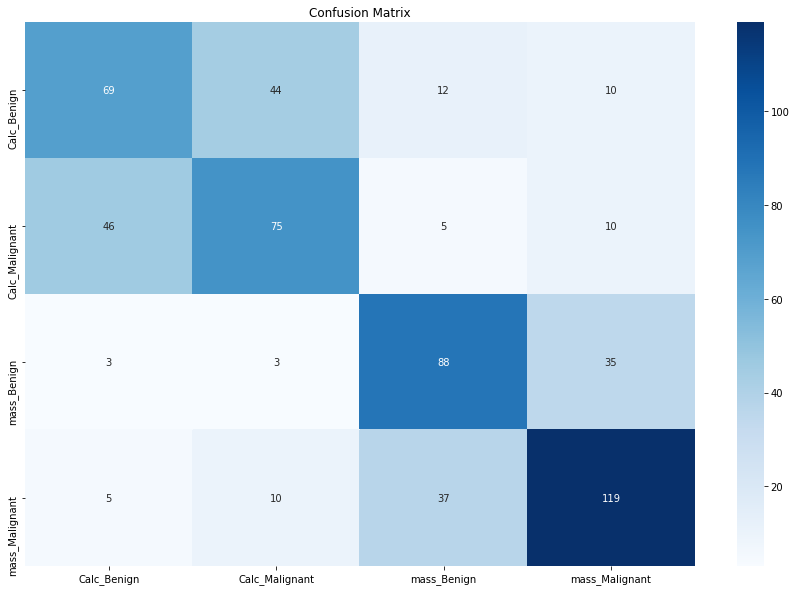

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


index = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
columns = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
cm_df = pd.DataFrame(matrix,columns,index)                      
plt.figure(figsize=(15,10)) 
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')